# Stock

---

## Starter Code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json



### Use the Marketstack API to retrieve stock data

In [7]:
# Set the API base URL
url = "https://api.marketstack.com/v1/eod?access_key=28095896f868ef118c8efcd179af2aed"

# Define params

## SPY
params_SPY = {"symbols": "SPY",
          "date_from": "2019-09-01", # type: ignore
          "date_to": "2024-09-01",
         "limit": 10000}

In [8]:
# Define an empty list to fetch the stock data for each stock
stock_data_SPY = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


    # Run an API request for each of the stock
try:
         #Parse the JSON and retrieve data
    
        ## NGC
    stock_raw_SPY = requests.get(url, params=params_SPY).json()
    print(json.dumps(stock_raw_SPY, indent=4, sort_keys=True))
    for x in stock_raw_SPY["data"]:
    
                # Parse out date, open, close, volume, and symbol
        stock_date_SPY = x["date"]
        stock_open_SPY = x["open"]
        stock_close_SPY = x["close"]
        stock_volume_SPY = x["volume"]
        stock_symbol_SPY = x["symbol"]

            # Append the trading information into stock_data list

        stock_data_SPY.append({"Date": stock_date_SPY,
                            "Open_SPY": stock_open_SPY,
                            "Close_SPY": stock_close_SPY,
                            "Volume_SPY": stock_volume_SPY,
                            "Symbol_SPY": stock_symbol_SPY})

    # If an error is experienced, skip the date
except:
    print("data not found. Skipping...")
    pass

    # pause to avoid rate limiting
time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
{
    "data": [
        {
            "adj_close": 563.68,
            "adj_high": 564.2,
            "adj_low": 557.14,
            "adj_open": 560.77,
            "adj_volume": 62700110.0,
            "close": 563.68,
            "date": "2024-08-30T00:00:00+0000",
            "dividend": 0.0,
            "exchange": "ARCX",
            "high": 564.2,
            "low": 557.14,
            "open": 560.77,
            "split_factor": 1.0,
            "symbol": "SPY",
            "volume": 62700110.0
        },
        {
            "adj_close": 558.35,
            "adj_high": 563.68,
            "adj_low": 557.18,
            "adj_open": 560.31,
            "adj_volume": 38715176.0,
            "close": 558.35,
            "date": "2024-08-29T00:00:00+0000",
            "dividend": 0.0,
            "exchange": "ARCX",
            "high": 563.68,
            "low": 557.18,
            "open": 560.31,
            "split_factor"

In [9]:
stock_SPY_df = pd.DataFrame(stock_data_SPY)
stock_SPY_df

,Date,Open_SPY,Close_SPY,Volume_SPY,Symbol_SPY
0,2024-08-30T00:00:00+0000,560.77,563.68,62700110.0,SPY
1,2024-08-29T00:00:00+0000,560.31,558.35,38681700.0,SPY
2,2024-08-28T00:00:00+0000,561.21,558.30,40869100.0,SPY
3,2024-08-27T00:00:00+0000,559.49,561.56,32526089.0,SPY
4,2024-08-26T00:00:00+0000,563.18,560.79,32789693.0,SPY
...,...,...,...,...,...
237,2023-09-25T00:00:00+0000,429.17,432.23,70874534.0,SPY
238,2023-09-22T00:00:00+0000,432.45,430.42,100829695.0,SPY
239,2023-09-21T00:00:00+0000,435.70,431.39,104095826.0,SPY
240,2023-09-20T00:00:00+0000,444.01,438.64,82562602.0,SPY


In [10]:
stock_SPY_df.head()

,Date,Open_SPY,Close_SPY,Volume_SPY,Symbol_SPY
0,2024-08-30T00:00:00+0000,560.77,563.68,62700110.0,SPY
1,2024-08-29T00:00:00+0000,560.31,558.35,38681700.0,SPY
2,2024-08-28T00:00:00+0000,561.21,558.30,40869100.0,SPY
3,2024-08-27T00:00:00+0000,559.49,561.56,32526089.0,SPY
4,2024-08-26T00:00:00+0000,563.18,560.79,32789693.0,SPY


In [11]:
# Export the City_Data into a csv
stock_SPY_df.to_csv("output_data/stock_SPY.csv")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
#city_data_df = pd.to_numeric(city_data_df['Lat'])

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camana,-16.6228,-72.7111,16.05,83,14,4.92,PE,1726362491
1,port-aux-francais,-49.3500,70.2167,0.58,64,81,15.52,TF,1726362492
2,ushuaia,-54.8000,-68.3000,1.22,94,100,4.34,AR,1726362494
3,invercargill,-46.4000,168.3500,7.23,92,100,0.89,NZ,1726362495
4,adamstown,-25.0660,-130.1015,19.76,65,6,5.92,PN,1726362496


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

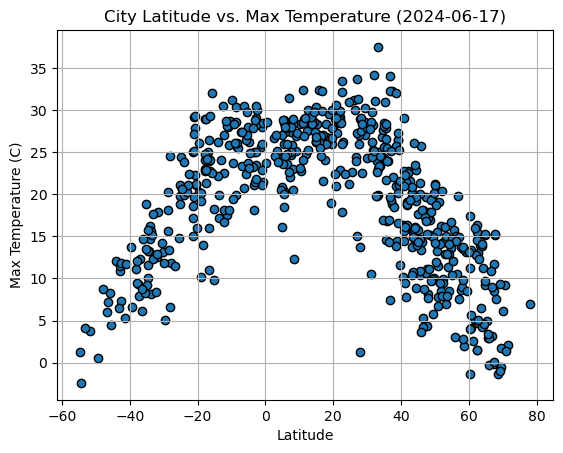

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

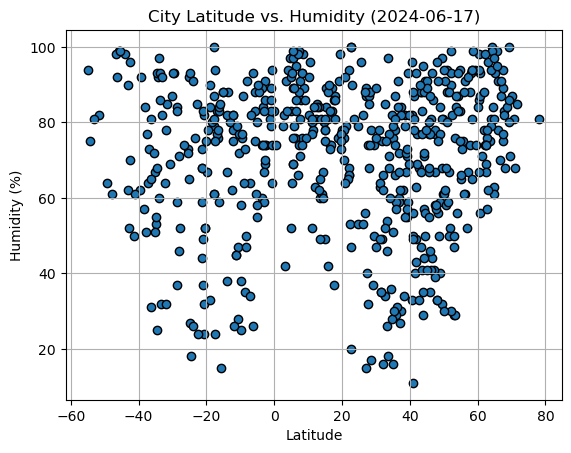

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

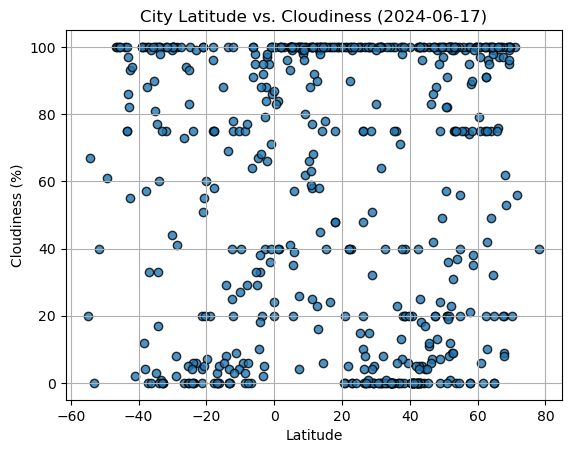

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

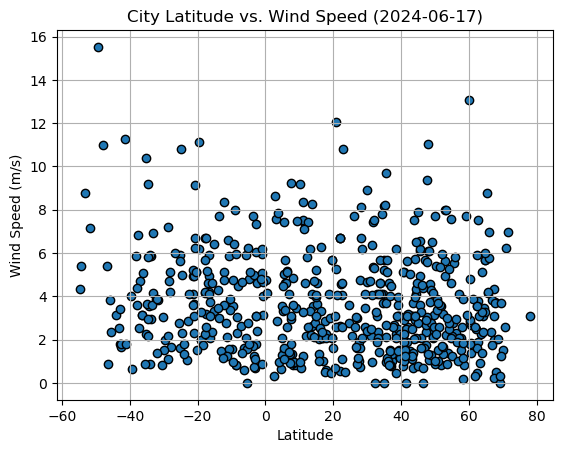

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
from sklearn import datasets
# Define a function to create Linear Regression plots
#x_values = df['']
#y_values = df['']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Rooms in House')
#plt.ylabel('Median House Prices ($100,000)')
#print(f"The r-squared is: {rvalue**2}")
#plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,vadso,70.0744,29.7487,6.09,87,100,1.54,NO,1726362499
7,thompson,55.7435,-97.8558,15.71,75,100,5.53,CA,1726362500
8,constantia,44.1833,28.6500,14.38,57,83,5.72,RO,1726362501
9,whitehorse,60.7161,-135.0538,13.39,56,83,2.68,CA,1726362503
10,aljezur,37.3191,-8.8033,18.82,84,8,1.03,PT,1726362504


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camana,-16.6228,-72.7111,16.05,83,14,4.92,PE,1726362491
1,port-aux-francais,-49.3500,70.2167,0.58,64,81,15.52,TF,1726362492
2,ushuaia,-54.8000,-68.3000,1.22,94,100,4.34,AR,1726362494
3,invercargill,-46.4000,168.3500,7.23,92,100,0.89,NZ,1726362495
4,adamstown,-25.0660,-130.1015,19.76,65,6,5.92,PN,1726362496


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.588885747266255


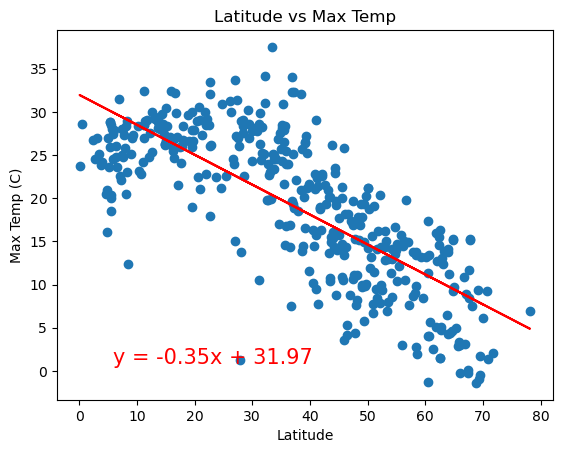

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.679592533948813


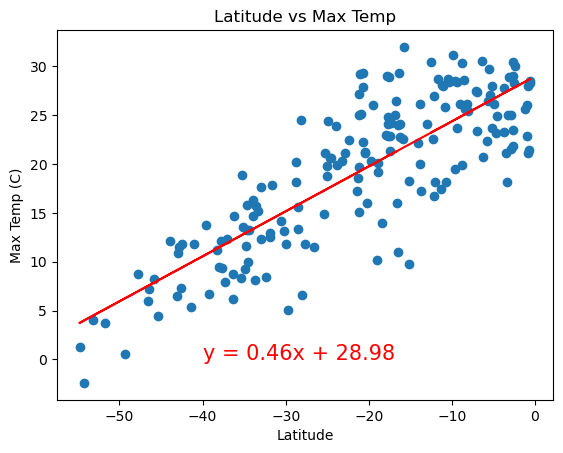

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Temperature is highest at Zero Latitude, and lower when latitude changes

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00031766607636031307


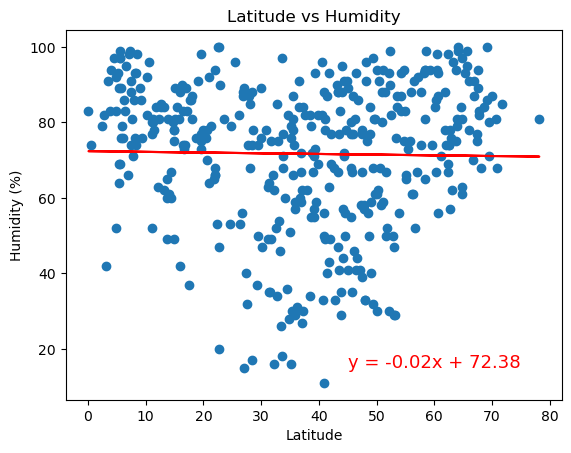

In [39]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=13,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0023774845573220787


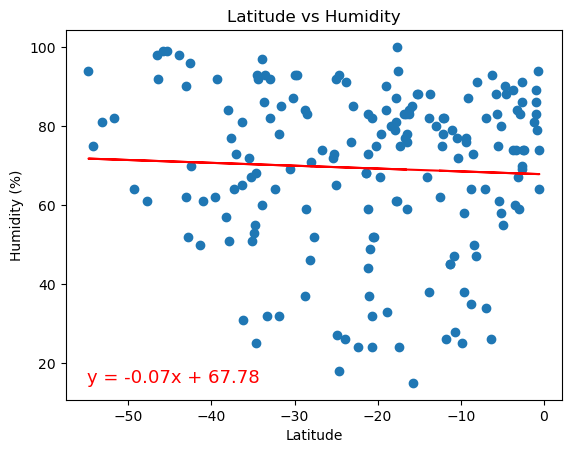

In [41]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=13,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Humidity is the same from south to north Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 5.954430149978491e-05


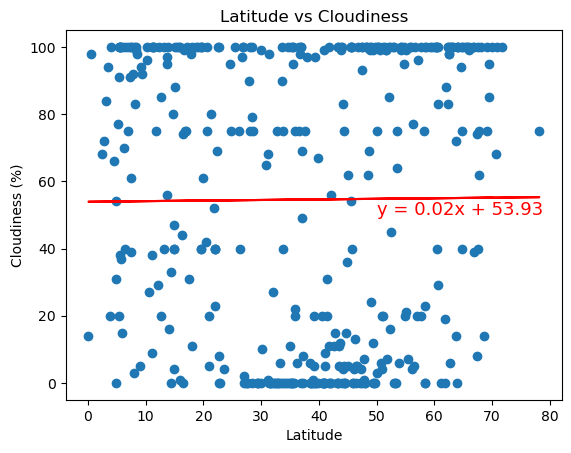

In [43]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=13,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 4.188791881963649e-05


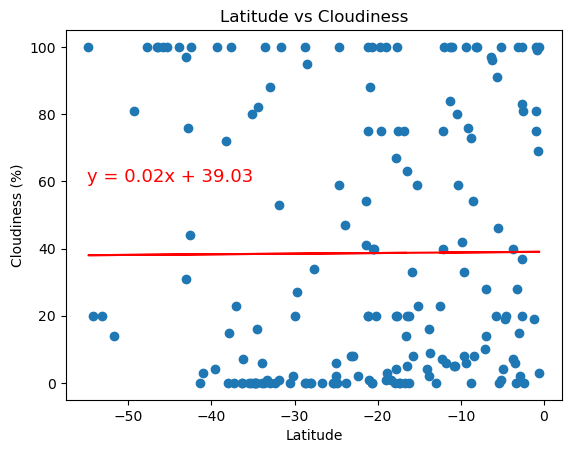

In [45]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=13,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The higher the Latitude, the more cloudy

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002789402460962994


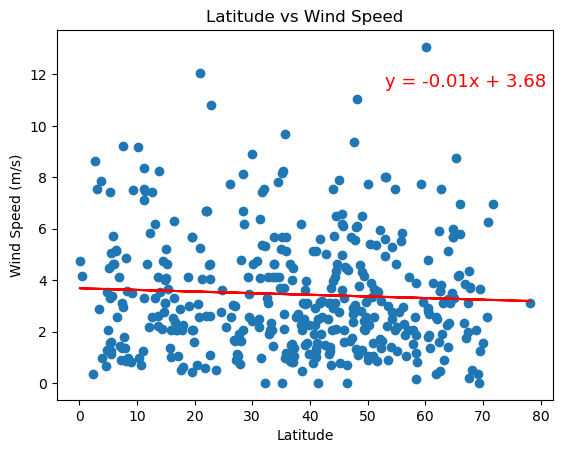

In [47]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,11.5),fontsize=13,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.027330816673795385


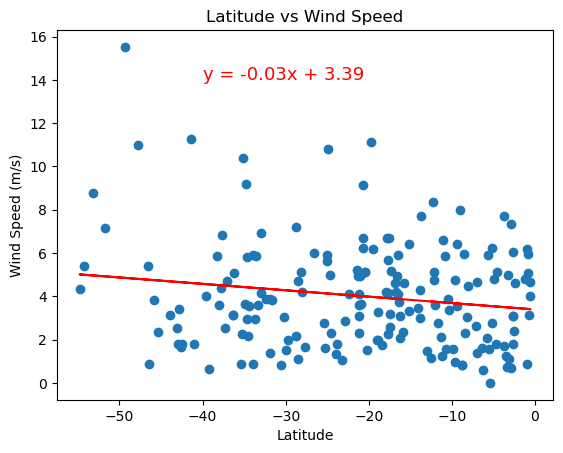

In [49]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,14),fontsize=13,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The lower the Latitude, the faster the Wind Speed